In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import glob
import numpy as np

#train_data 불러오기

In [ ]:
def unify_96_to_98(data):
    """
    (n, 96) 형태의 데이터를 (n, 98)로 변환.
    각 행(row)에 대해 평균값 2개를 추가.
    data: (n, 96) 또는 (n, 98)
    return: (n, 98)
    """
    if data.shape[1] == 96:
        # 각 행의 평균값 계산
        row_mean = np.mean(data, axis=1, keepdims=True)  # (n, 1)
        # 평균값을 2개로 확장
        two_means = np.hstack([row_mean, row_mean])       # (n, 2)
        # 기존 데이터 + 평균값 2개
        data_98 = np.hstack([data, two_means])           # (n, 98)
        return data_98
    elif data.shape[1] == 98:
        # 이미 98이면 그대로 반환
        return data


In [ ]:
!pip install tqdm

In [ ]:
import os
import glob
import numpy as np
import random
from tqdm import tqdm  # tqdm 임포트

# 📌 Google Drive 내 최상위 폴더 경로
base_dir = "/content/drive/MyDrive/DATA/training/01.원천데이터"
# 폴더 구조 정의
folders = {
    "Dev_96/NPY/IONIQ": ["NORMAL", "CAUTION", "DEFECT"],
    "Dev_98/NPY/KONA":  ["NORMAL", "CAUTION", "DEFECT"],
    "Dev_98/NPY/NIRO":  ["NORMAL", "CAUTION", "DEFECT"]
}

# 라벨별 데이터 저장용 (모두 (n, 98) 형태로 통일)
normal_data  = []
caution_data = []
defect_data  = []

label_mapping = {"normal":0, "caution":1, "defect":2}

for main_folder, sub_folders in folders.items():
    for sub_folder in sub_folders:
        folder_path = os.path.join(base_dir, main_folder, sub_folder)
        file_list = sorted(glob.glob(os.path.join(folder_path, "**", "*.npy"), recursive=True))

        print(f"[{main_folder}/{sub_folder}] 파일 개수:", len(file_list))

        # tqdm으로 파일 처리 상황 표시
        for file_path in tqdm(file_list, desc=f"Processing {main_folder}/{sub_folder}"):
            data = np.load(file_path)  # (n, 96) or (n, 98)
            if data.size == 0:
                print(f"⚠️ {file_path} 파일이 비어있습니다. 스킵.")
                continue

            # 96→98 변환
            data_98 = unify_96_to_98(data)  # (n, 98)

            # 라벨별 리스트에 쌓기
            label = sub_folder.lower()  # normal, caution, defect
            if label == "normal":
                normal_data.append(data_98)
            elif label == "caution":
                caution_data.append(data_98)
            elif label == "defect":
                defect_data.append(data_98)
            else:
                print(f"⚠️ 알 수 없는 라벨: {sub_folder}")


[Dev_96/NPY/IONIQ/NORMAL] 파일 개수: 9732


Processing Dev_96/NPY/IONIQ/NORMAL: 100%|██████████| 9732/9732 [00:25<00:00, 379.17it/s]


[Dev_96/NPY/IONIQ/CAUTION] 파일 개수: 9800


Processing Dev_96/NPY/IONIQ/CAUTION: 100%|██████████| 9800/9800 [37:44<00:00,  4.33it/s]


[Dev_96/NPY/IONIQ/DEFECT] 파일 개수: 9844


Processing Dev_96/NPY/IONIQ/DEFECT: 100%|██████████| 9844/9844 [33:31<00:00,  4.89it/s]


[Dev_98/NPY/KONA/NORMAL] 파일 개수: 9745


Processing Dev_98/NPY/KONA/NORMAL: 100%|██████████| 9745/9745 [32:35<00:00,  4.98it/s]


[Dev_98/NPY/KONA/CAUTION] 파일 개수: 9886


Processing Dev_98/NPY/KONA/CAUTION: 100%|██████████| 9886/9886 [39:02<00:00,  4.22it/s]


[Dev_98/NPY/KONA/DEFECT] 파일 개수: 9790


Processing Dev_98/NPY/KONA/DEFECT: 100%|██████████| 9790/9790 [39:23<00:00,  4.14it/s]


[Dev_98/NPY/NIRO/NORMAL] 파일 개수: 9770


Processing Dev_98/NPY/NIRO/NORMAL: 100%|██████████| 9770/9770 [29:45<00:00,  5.47it/s]


[Dev_98/NPY/NIRO/CAUTION] 파일 개수: 9732


Processing Dev_98/NPY/NIRO/CAUTION: 100%|██████████| 9732/9732 [37:16<00:00,  4.35it/s]


[Dev_98/NPY/NIRO/DEFECT] 파일 개수: 9829


Processing Dev_98/NPY/NIRO/DEFECT: 100%|██████████| 9829/9829 [35:37<00:00,  4.60it/s]


In [ ]:
def concat_label_data(data_list):
    """
    data_list: [ (n1, 98), (n2, 98), ... ]
    return: (N, 98) 하나의 배열
    """
    if len(data_list) == 0:
        return np.empty((0, 98))  # 빈 배열
    return np.concatenate(data_list, axis=0)  # (N, 98)

normal_arr  = concat_label_data(normal_data)   # (N_normal,  98)
caution_arr = concat_label_data(caution_data)  # (N_caution, 98)
defect_arr  = concat_label_data(defect_data)   # (N_defect,  98)

print("normal_arr shape:",  normal_arr.shape)
print("caution_arr shape:", caution_arr.shape)
print("defect_arr shape:",  defect_arr.shape)


normal_arr shape: (770977, 98)
caution_arr shape: (584051, 98)
defect_arr shape: (584498, 98)


In [ ]:
np.save("/content/drive/MyDrive/list/train_normal_arr.npy", normal_arr)
np.save("/content/drive/MyDrive/list/train_caution_arr.npy", caution_arr)
np.save("/content/drive/MyDrive/list/train_defect_arr.npy", defect_arr)

In [ ]:
import numpy as np

normal_arr = np.load("/content/drive/MyDrive/list/train_normal_arr.npy")
caution_arr = np.load("/content/drive/MyDrive/list/train_caution_arr.npy")
defect_arr = np.load("/content/drive/MyDrive/list/train_defect_arr.npy")

#모델구축

In [ ]:
import numpy as np

# 슬라이딩 윈도우 생성 함수
def create_sliding_windows(arr, window_size=100, step=30):
    n_rows = arr.shape[0]
    windows = []
    for i in range(0, n_rows - window_size + 1, step):
        windows.append(arr[i:i+window_size])
    return np.array(windows)

# 각 배열에 대해 슬라이딩 윈도우 적용
normal_windows = create_sliding_windows(normal_arr, window_size=100, step=30)   # shape: (192, 100, 98)
caution_windows = create_sliding_windows(caution_arr, window_size=100, step=30)   # shape: (197, 100, 98)
defect_windows = create_sliding_windows(defect_arr, window_size=100, step=30)     # shape: (198, 100, 98)

# 각 데이터별 라벨 생성
normal_labels = np.zeros(len(normal_windows))         # 정상: 0, 길이: 192
caution_labels = np.ones(len(caution_windows))          # 주의: 1, 길이: 197
defect_labels = np.full(len(defect_windows), 2)           # 결함: 2, 길이: 198

# 모든 윈도우 데이터를 concat (axis=0)하여 하나의 X 배열 생성
X_train = np.concatenate([normal_windows, caution_windows, defect_windows], axis=0)
# 모든 라벨을 concat하여 하나의 y 배열 생성
y_train = np.concatenate([normal_labels, caution_labels, defect_labels], axis=0)

print("최종 X shape:", X_train.shape)
print("최종 y shape:", y_train.shape)



최종 X shape: (64642, 100, 98)
최종 y shape: (64642,)


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# X의 shape: (전체 윈도우 수, 100, 98)
n_samples, win_size, num_features = X_train.shape
# 2차원 입력으로 변환: (전체 윈도우 수, 100*98)
X_train = X_train.reshape(n_samples, win_size * num_features)

In [ ]:
# 랜덤 포레스트 모델의 파라미터를 개별 변수로 지정
n_estimators = 50
max_depth = 10
min_samples_split = 2
min_samples_leaf = 1
criterion = "gini"
random_state = 42

# 랜덤 포레스트 분류 모델 생성
clf = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    criterion=criterion,
    random_state=random_state
)

# 전체 데이터를 이용하여 모델 학습
clf.fit(X_train, y_train)

print("모델 학습 완료!")


모델 학습 완료!


#XAI

shap_values_for_class shape: (64642, 9800)


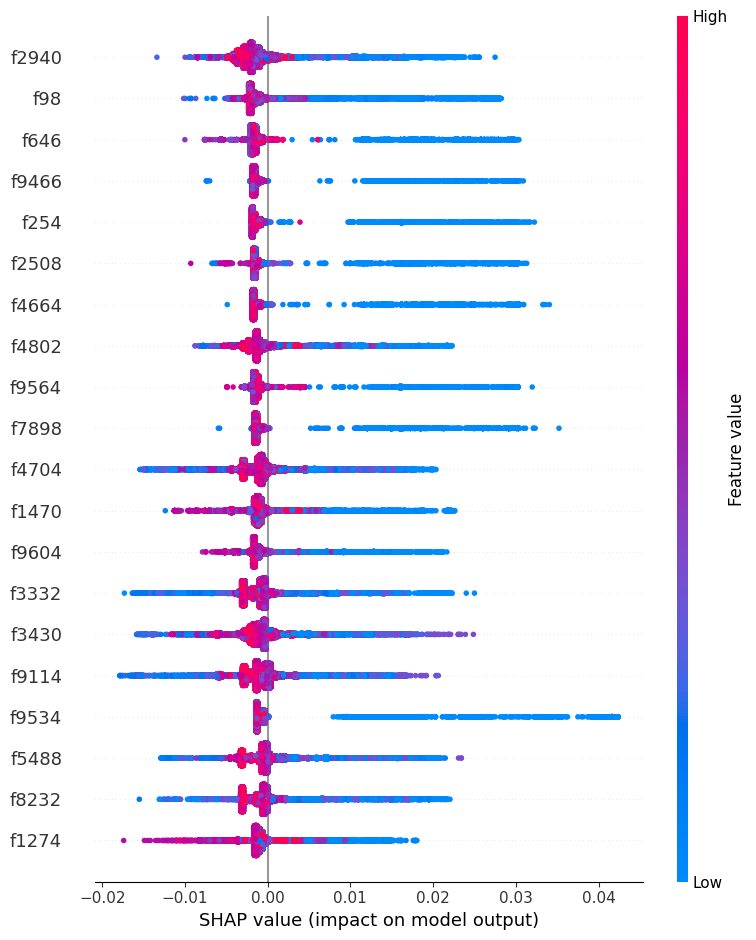

In [ ]:
# shap_values.shape == (64642, 9800, 3)
# X_train_df.shape  == (64642, 9800)

class_index = 2  # 보고 싶은 클래스(0,1,2 중 선택)

# 세 번째 축(axis=2)에서 class_index를 선택 -> (64642, 9800)
shap_values_for_class = shap_values[:, :, class_index]

print("shap_values_for_class shape:", shap_values_for_class.shape)
# 결과: (64642, 9800) -> X_train_df와 동일

# summary_plot 실행
shap.summary_plot(shap_values_for_class, X_train_df, feature_names=feature_names, max_display=20)


shap_values_for_class shape: (64642, 9800)


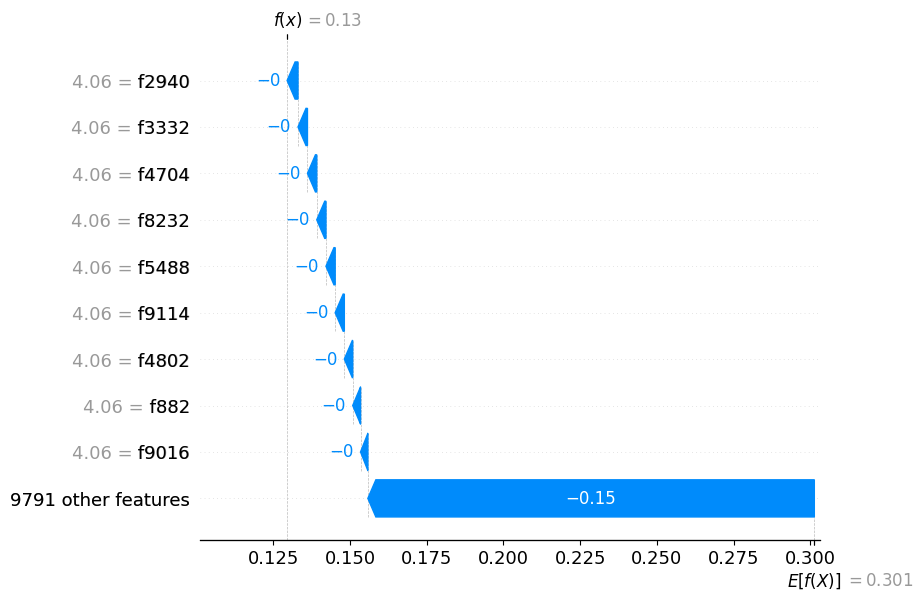

In [ ]:
import shap

# 1. 다중 클래스 중에서 보고 싶은 클래스 선택 (예: 클래스 1)
class_index = 2  # (0, 1, 2 중에서 골라주세요)

# 2. (n_samples, n_features, n_classes)에서 세 번째 축(axis=2)으로 클래스 추출
#    → (n_samples, n_features) 형태
shap_values_for_class = shap_values[:, :, class_index]
print("shap_values_for_class shape:", shap_values_for_class.shape)
# 결과: (64642, 9800)  -> X_train_df.shape와 동일

# 3. Waterfall Plot을 위해 특정 샘플 선택 (예: sample_index=0)
sample_index = 0
sample_shap_values = shap_values_for_class[sample_index]  # (9800,)

# 4. base_values도 해당 클래스에 맞춰 선택
#    explainer.expected_value가 (3,) 형태라면, class_index=1에 해당하는 값만 사용
base_value = explainer.expected_value[class_index]

# 5. Waterfall Plot 실행
shap.waterfall_plot(
    shap.Explanation(
        values=sample_shap_values,           # (9800,) → 선택된 샘플의 SHAP 값
        base_values=base_value,              # 해당 클래스의 base_value
        data=X_train_df.iloc[sample_index],  # 샘플의 원본 Feature (Series, shape=(9800,))
        feature_names=feature_names          # Feature 이름 (9800개)
    )
)


#test_data 불러오기

In [ ]:
import os
import glob
import numpy as np
from tqdm import tqdm  # tqdm 임포트

# 테스트 데이터가 저장된 폴더와 서브 폴더 지정
base_dir = "/content/drive/MyDrive/DATA/Validation/01.원천데이터"
# 폴더 구조 정의
folders = {
    "Dev_96/NPY/IONIQ": ["NORMAL", "CAUTION", "DEFECT"],
    "Dev_98/NPY/KONA":  ["NORMAL", "CAUTION", "DEFECT"],
    "Dev_98/NPY/NIRO":  ["NORMAL", "CAUTION", "DEFECT"]
}

# 라벨별 데이터 저장용 (모두 (n, 98) 형태로 통일)
normal_data  = []
caution_data = []
defect_data  = []

label_mapping = {"normal":0, "caution":1, "defect":2}

for main_folder, sub_folders in folders.items():
    for sub_folder in sub_folders:
        folder_path = os.path.join(base_dir, main_folder, sub_folder)
        file_list = sorted(glob.glob(os.path.join(folder_path, "**", "*.npy"), recursive=True))

        print(f"[{main_folder}/{sub_folder}] 파일 개수:", len(file_list))

        # tqdm으로 진행률 표시
        for file_path in tqdm(file_list, desc=f"Processing {main_folder}/{sub_folder}"):
            data = np.load(file_path)  # (n, 96) or (n, 98)
            if data.size == 0:
                print(f"⚠️ {file_path} 파일이 비어있습니다. 스킵.")
                continue

            # 96→98 변환 (구현에 맞게 수정)
            data_98 = unify_96_to_98(data)  # (n, 98)

            # 라벨별 리스트에 쌓기
            label = sub_folder.lower()  # normal, caution, defect
            if label == "normal":
                normal_data.append(data_98)
            elif label == "caution":
                caution_data.append(data_98)
            elif label == "defect":
                defect_data.append(data_98)
            else:
                print(f"⚠️ 알 수 없는 라벨: {sub_folder}")


[Dev_96/NPY/IONIQ/NORMAL] 파일 개수: 1303


Processing Dev_96/NPY/IONIQ/NORMAL: 100%|██████████| 1303/1303 [04:49<00:00,  4.50it/s]


[Dev_96/NPY/IONIQ/CAUTION] 파일 개수: 1199


Processing Dev_96/NPY/IONIQ/CAUTION: 100%|██████████| 1199/1199 [04:59<00:00,  4.00it/s]


[Dev_96/NPY/IONIQ/DEFECT] 파일 개수: 1170


Processing Dev_96/NPY/IONIQ/DEFECT: 100%|██████████| 1170/1170 [04:01<00:00,  4.84it/s]


[Dev_98/NPY/KONA/NORMAL] 파일 개수: 1231


Processing Dev_98/NPY/KONA/NORMAL: 100%|██████████| 1231/1231 [04:20<00:00,  4.73it/s]


[Dev_98/NPY/KONA/CAUTION] 파일 개수: 1161


Processing Dev_98/NPY/KONA/CAUTION: 100%|██████████| 1161/1161 [04:26<00:00,  4.36it/s]


[Dev_98/NPY/KONA/DEFECT] 파일 개수: 1251


Processing Dev_98/NPY/KONA/DEFECT: 100%|██████████| 1251/1251 [05:01<00:00,  4.15it/s]


[Dev_98/NPY/NIRO/NORMAL] 파일 개수: 1235


Processing Dev_98/NPY/NIRO/NORMAL: 100%|██████████| 1235/1235 [04:17<00:00,  4.79it/s]


[Dev_98/NPY/NIRO/CAUTION] 파일 개수: 1288


Processing Dev_98/NPY/NIRO/CAUTION: 100%|██████████| 1288/1288 [04:39<00:00,  4.61it/s]


[Dev_98/NPY/NIRO/DEFECT] 파일 개수: 1178


Processing Dev_98/NPY/NIRO/DEFECT: 100%|██████████| 1178/1178 [04:21<00:00,  4.50it/s]


In [ ]:
np.save("/content/drive/MyDrive/list/test_val_normal_arr.npy", test_normal_arr)
np.save("/content/drive/MyDrive/list/test_val_caution_arr.npy", test_caution_arr)
np.save("/content/drive/MyDrive/list/test_val_defect_arr.npy", test_defect_arr)

In [ ]:
import numpy as np

normal_arr = np.load("/content/drive/MyDrive/list/test_normal_arr.npy")
caution_arr = np.load("/content/drive/MyDrive/list/test_caution_arr.npy")
defect_arr = np.load("/content/drive/MyDrive/list/test_defect_arr.npy")

In [ ]:
import numpy as np

# 슬라이딩 윈도우 생성 함수
def create_sliding_windows(arr, window_size=100, step=30):
    n_rows = arr.shape[0]
    windows = []
    for i in range(0, n_rows - window_size + 1, step):
        windows.append(arr[i:i+window_size])
    return np.array(windows)

# 각 배열에 대해 슬라이딩 윈도우 적용
normal_windows = create_sliding_windows(normal_arr, window_size=100, step=30)   # shape: (192, 100, 98)
caution_windows = create_sliding_windows(caution_arr, window_size=100, step=30)   # shape: (197, 100, 98)
defect_windows = create_sliding_windows(defect_arr, window_size=100, step=30)     # shape: (198, 100, 98)

# 각 데이터별 라벨 생성
normal_labels = np.zeros(len(normal_windows))         # 정상: 0, 길이: 192
caution_labels = np.ones(len(caution_windows))          # 주의: 1, 길이: 197
defect_labels = np.full(len(defect_windows), 2)           # 결함: 2, 길이: 198

# 모든 윈도우 데이터를 concat (axis=0)하여 하나의 X 배열 생성
X_test = np.concatenate([normal_windows, caution_windows, defect_windows], axis=0)
# 모든 라벨을 concat하여 하나의 y 배열 생성
y_test = np.concatenate([normal_labels, caution_labels, defect_labels], axis=0)

print("최종 X shape:", X_test.shape)
print("최종 y shape:", y_test.shape)


최종 X shape: (8101, 100, 98)
최종 y shape: (8101,)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# X_test는 (n_windows, 100, 98)의 shape를 가지므로, 모델 입력에 맞게 flatten 처리
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# 모델 예측
y_pred = clf.predict(X_test_flat)

# 성능 평가
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.8456980619676583
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.85      3317
         1.0       0.98      0.69      0.81      2408
         2.0       1.00      0.78      0.88      2376

    accuracy                           0.85      8101
   macro avg       0.90      0.83      0.85      8101
weighted avg       0.88      0.85      0.85      8101



In [ ]:
# 랜덤 포레스트 모델의 파라미터를 개별 변수로 지정
n_estimators = 500         # 트리 개수 (default: 100)
max_depth = 100           # 트리의 최대 깊이 (default: None, 즉 제한 없음)
min_samples_split = 200      # 내부 노드를 분할하기 위한 최소 샘플 수 (default: 2)
min_samples_leaf = 100       # 리프 노드에 있어야 할 최소 샘플 수 (default: 1)
criterion = "gini"      # 분할 기준 ("gini" 또는 "entropy")
random_state = 42          # 랜덤 시드 (재현 가능성 확보)

# 랜덤 포레스트 분류 모델 생성
clf = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    criterion=criterion,
    random_state=random_state
)

# 전체 데이터를 이용하여 모델 학습
clf.fit(X_train, y_train)

print("모델 학습 완료!")

모델 학습 완료!


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# X_test는 (n_windows, 100, 98)의 shape를 가지므로, 모델 입력에 맞게 flatten 처리
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# 모델 예측
y_pred = clf.predict(X_test_flat)

# 성능 평가
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9875324034069868
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3317
         1.0       0.98      0.99      0.99      2408
         2.0       0.99      0.97      0.98      2376

    accuracy                           0.99      8101
   macro avg       0.99      0.99      0.99      8101
weighted avg       0.99      0.99      0.99      8101

